## Logistic Regression (Binary Classification) 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Text(0, 0.5, 'bought_insurance')

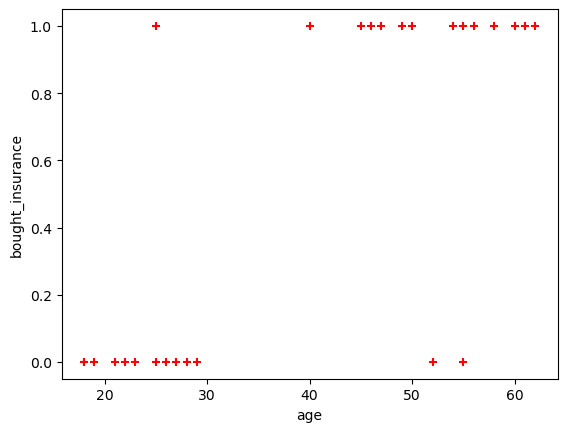

In [3]:
plt.scatter(df.age,df.bought_insurance,marker = '+',color = 'red')
plt.xlabel('age')
plt.ylabel('bought_insurance')

In [4]:
df.shape

(27, 2)

In [5]:
X = df[['age']]
y = df['bought_insurance']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:
X_train.shape

(21, 1)

In [9]:
X_test

,age
9,61
13,29
11,28
6,55
3,52
18,19


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0])

In [13]:
model.score(X_test,y_test)

0.6666666666666666

In [14]:
model.predict_proba(X_test)

array([[7.84786105e-06, 9.99992152e-01],
       [5.43430462e-01, 4.56569538e-01],
       [6.33428884e-01, 3.66571116e-01],
       [7.34747708e-05, 9.99926525e-01],
       [2.24791680e-04, 9.99775208e-01],
       [9.80200593e-01, 1.97994070e-02]])

## Exercise logistic Regression

* satisfaction_level = ความพึงพอใจในงาน 
* last_evaluation = คะแนนประเมินพนักงงาน
* promotion_last_5years = พนักงานได้เลื่อนขั้นหรือไม่ใน 5 ปี




In [15]:
df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Text(0, 0.5, 'left')

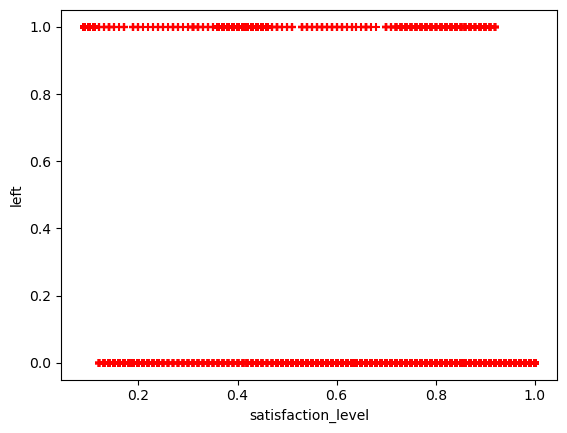

In [16]:
plt.scatter(df.satisfaction_level,df.left,marker = '+',color = 'red')
plt.xlabel('satisfaction_level')
plt.ylabel('left')

Text(0, 0.5, 'left')

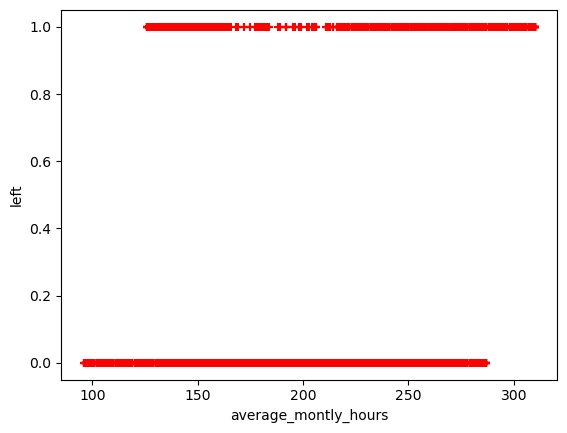

In [17]:
plt.scatter(df.average_montly_hours,df.left,marker = '+',color = 'red')
plt.xlabel('average_montly_hours')
plt.ylabel('left')

### Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
left_mean   = df.groupby('left').mean()['satisfaction_level']
left_max    = df.groupby('left').max()['satisfaction_level']
left_median = df.groupby('left').median()['satisfaction_level']

In [28]:
left_describe = pd.concat([left_mean, left_median, left_max],axis = 'columns')
left_describe.columns = ['left_mean', 'left_median', 'left_max']
left_describe

,left_mean,left_median,left_max
left,,,
0,0.666810,0.69,1.00
1,0.440098,0.41,0.92


In [29]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


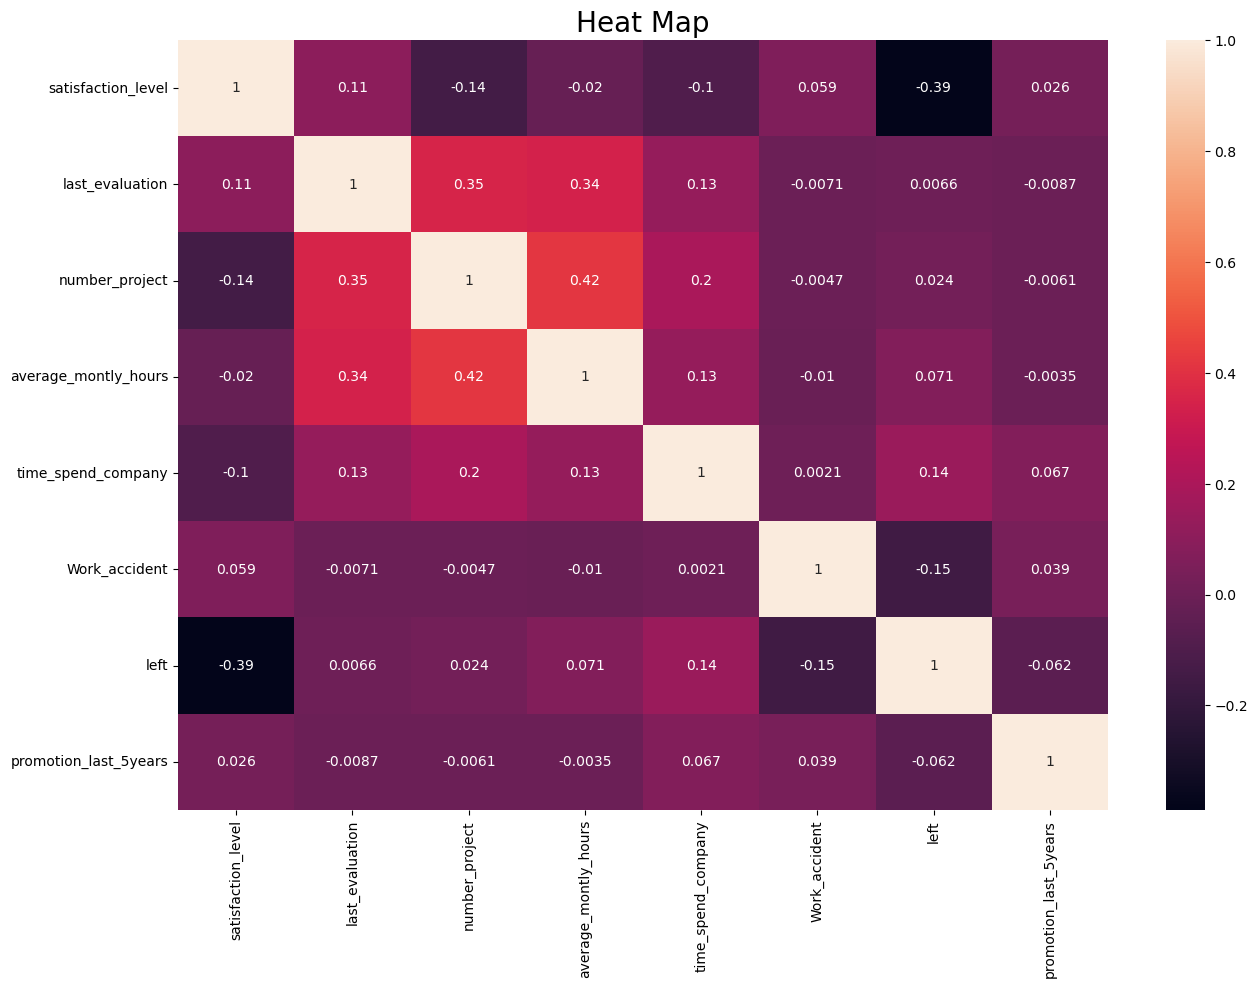

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

#### Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary'>

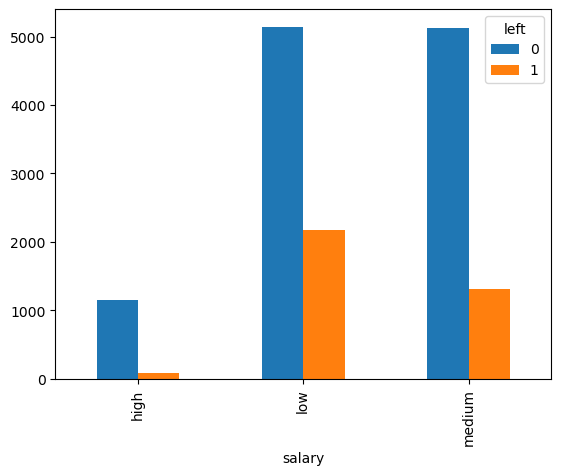

In [31]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

#### Plot bar charts showing corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

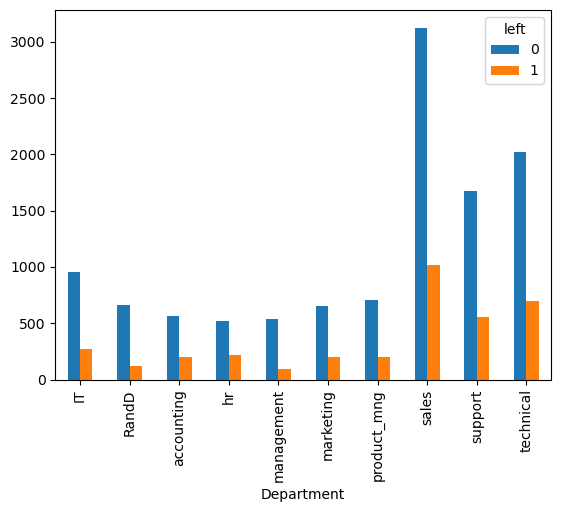

In [32]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [33]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
salary_le = LabelEncoder()
department_le = LabelEncoder()

In [38]:
df['salary_le'] = salary_le.fit_transform(df['salary'])
df['department_le'] = department_le.fit_transform(df['Department'])

In [39]:
df = df.drop(['Department','salary'], axis = 'columns')

In [40]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_le,department_le
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,8
14995,0.37,0.48,2,160,3,0,1,0,1,8
14996,0.37,0.53,2,143,3,0,1,0,1,8
14997,0.11,0.96,6,280,4,0,1,0,1,8


In [41]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_le,department_le
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754,0.003153
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965,0.007772
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672,0.009268
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082,0.003913
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086,-0.018010
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506,0.003425
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294,0.032105
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318,-0.027336
salary_le,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000,0.000685
department_le,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,0.000685,1.000000


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop('left', axis = 'columns')
y = df['left']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.85,
                                                   random_state = 1)

In [45]:
len(X_train)

12749

In [46]:
len(X_test)

2250

In [47]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (12749, 9)
y_train: (12749,)
X_test: (2250, 9)
y_test: (2250,)


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
model.intercept_

array([0.11856604])

In [52]:
model.coef_

array([[-4.14564439,  0.63075699, -0.30866541,  0.00416947,  0.22300627,
        -1.35588427, -0.92285787,  0.0200584 ,  0.03642492]])

In [53]:
from sklearn import metrics

In [54]:
y_pred = model.predict(X_test)

In [55]:
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, y_pred))

print("Accuracy                : ", model.score(X_test,y_test))

Mean Absolute Error     :  0.22177777777777777
Mean Squared Error      :  0.22177777777777777
Root Mean Squared Error :  0.47093288033198294
R2 Score                :  -0.21588693957115002
Accuracy                :  0.7782222222222223
